In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

In [ ]:
import os
import glob
size=224

train_images=[]
train_labels=[]

for directory_path in glob.glob("/content/drive/MyDrive/augmented_main_images_cross_wavelet_binary/*"):
    label=directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path,"*.png")):
        img=cv2.imread(img_path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(size,size))
        img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)


train_images=np.array(train_images)
train_labels=np.array(train_labels)

test_images=[]
test_labels=[]

for directory_path in glob.glob("/content/drive/MyDrive/val1/*"):
    fruit_label=directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path,"*.png")):
        img=cv2.imread(img_path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(size,size))
        img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

test_images=np.array(test_images)
test_labels=np.array(test_labels)

In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded=le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded=le.transform(train_labels)


x_train,y_train,x_test,y_test=train_images,train_labels_encoded,test_images,test_labels_encoded

x_train,x_test=x_train/255.0,x_test/255.0


import seaborn as sns
from tensorflow.keras.applications.vgg19 import VGG19

VGG19_model=VGG19(weights='imagenet',include_top=False,input_shape=(size,size,3))

for layer in VGG19_model.layers:
    layer.trainable=False

VGG19_feature_extractor=VGG19_model.predict(x_train)
VGG19_features=VGG19_feature_extractor.reshape(VGG19_feature_extractor.shape[0],-1)


VGG19_X=VGG19_features




In [18]:
VGG19_X_test_feature=VGG19_model.predict(x_test)
VGG19_X_test_features=VGG19_X_test_feature.reshape(VGG19_X_test_feature.shape[0],-1)

In [19]:
from sklearn.ensemble import RandomForestClassifier
VGG19_RF=RandomForestClassifier(n_estimators=200,random_state=42)

VGG19_RF.fit(VGG19_X,y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [20]:
VGG19_prediction_RF=VGG19_RF.predict(VGG19_X_test_features)
VGG19_prediction_RF1=le.inverse_transform(VGG19_prediction_RF)

from sklearn import metrics
print("Accuracy= ",metrics.accuracy_score(test_labels_encoded,VGG19_prediction_RF))

Accuracy=  0.8478260869565217


In [21]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_encoded,VGG19_prediction_RF))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82        20
           1       0.85      0.88      0.87        26

    accuracy                           0.85        46
   macro avg       0.85      0.84      0.84        46
weighted avg       0.85      0.85      0.85        46



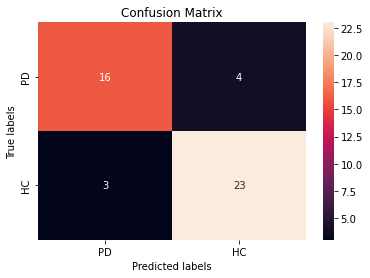

In [22]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(test_labels_encoded,VGG19_prediction_RF)
ax= plt.subplot()
sns.heatmap(cm1,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['PD', 'HC'])
ax.yaxis.set_ticklabels(['PD', 'HC']);

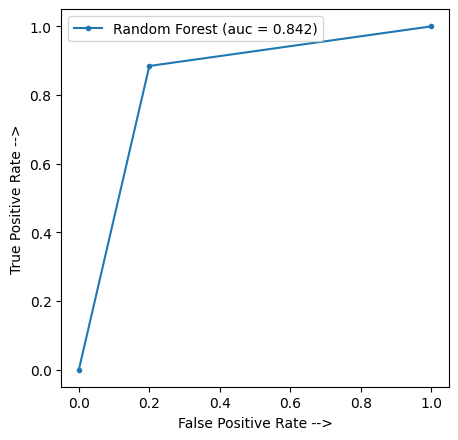

In [23]:
from sklearn.metrics import roc_curve, auc

RF_fpr, RF_tpr, threshold = roc_curve(test_labels_encoded, VGG19_prediction_RF)
auc_RF = auc(RF_fpr, RF_tpr)


plt.figure(figsize=(5, 5), dpi=100)

plt.plot(RF_fpr, RF_tpr, marker='.', label='Random Forest (auc = %0.3f)' % auc_RF)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [24]:
from sklearn.svm import SVC
VGG19_SF=SVC(kernel='rbf',C=13,probability=True)
VGG19_SF.fit(VGG19_X,y_train)

VGG19_prediction_SF=VGG19_SF.predict(VGG19_X_test_features)
VGG19_prediction_SF1=le.inverse_transform(VGG19_prediction_SF)

from sklearn import metrics
print("Accuracy= ",metrics.accuracy_score(test_labels_encoded,VGG19_prediction_SF))

Accuracy=  0.8260869565217391


In [25]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_encoded,VGG19_prediction_SF))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.85      0.85      0.85        26

    accuracy                           0.83        46
   macro avg       0.82      0.82      0.82        46
weighted avg       0.83      0.83      0.83        46



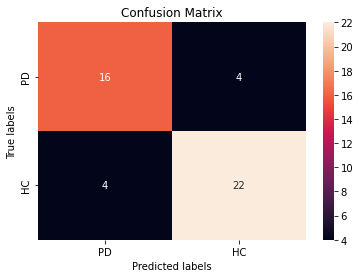

In [26]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(test_labels_encoded,VGG19_prediction_SF)
ax=plt.subplot()
sns.heatmap(cm1,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['PD', 'HC'])
ax.yaxis.set_ticklabels(['PD', 'HC']);

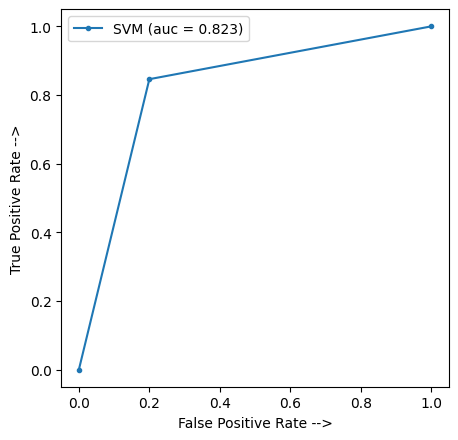

In [27]:
from sklearn.metrics import roc_curve, auc

SF_fpr, SF_tpr, threshold = roc_curve(test_labels_encoded, VGG19_prediction_SF)
auc_SF = auc(SF_fpr, SF_tpr)


plt.figure(figsize=(5, 5), dpi=100)

plt.plot(SF_fpr, SF_tpr, marker='.', label='SVM (auc = %0.3f)' % auc_SF)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression
VGG19_LF=LogisticRegression()
VGG19_LF.fit(VGG19_X,y_train)

VGG19_prediction_LF=VGG19_LF.predict(VGG19_X_test_features)
VGG19_prediction_LF1=le.inverse_transform(VGG19_prediction_LF)

from sklearn import metrics
print("Accuracy= ",metrics.accuracy_score(test_labels_encoded,VGG19_prediction_LF))

Accuracy=  0.8260869565217391


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [29]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_encoded,VGG19_prediction_LF))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.88      0.81      0.84        26

    accuracy                           0.83        46
   macro avg       0.82      0.83      0.82        46
weighted avg       0.83      0.83      0.83        46



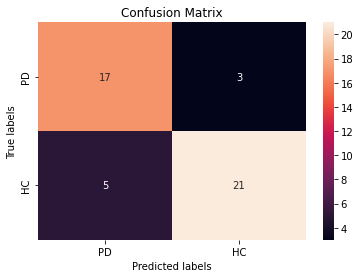

In [30]:
cm2=confusion_matrix(test_labels_encoded,VGG19_prediction_LF)
ax=plt.subplot()
sns.heatmap(cm2,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['PD', 'HC'])
ax.yaxis.set_ticklabels(['PD', 'HC']);

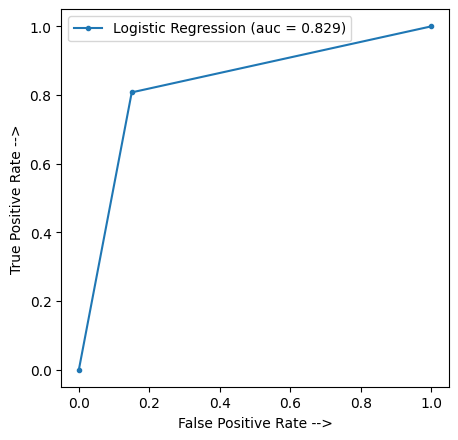

In [31]:
from sklearn.metrics import roc_curve, auc

LF_fpr, LF_tpr, threshold = roc_curve(test_labels_encoded, VGG19_prediction_LF)
auc_LF = auc(LF_fpr, LF_tpr)


plt.figure(figsize=(5, 5), dpi=100)

plt.plot(LF_fpr, LF_tpr, marker='.', label='Logistic Regression (auc = %0.3f)' % auc_LF)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [46]:
from sklearn.neighbors import KNeighborsClassifier
VGG19_knn=KNeighborsClassifier(n_neighbors=2,weights='uniform',algorithm='brute',metric='minkowski')
VGG19_knn.fit(VGG19_X,y_train)
VGG19_prediction_knn=VGG19_knn.predict(VGG19_X_test_features)
VGG19_prediction_knn1=le.inverse_transform(VGG19_prediction_knn)
from sklearn import metrics
print("Accuracy= ",metrics.accuracy_score(test_labels_encoded,VGG19_prediction_knn))

Accuracy=  0.717391304347826


In [47]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_encoded,VGG19_prediction_knn))

              precision    recall  f1-score   support

           0       0.68      0.65      0.67        20
           1       0.74      0.77      0.75        26

    accuracy                           0.72        46
   macro avg       0.71      0.71      0.71        46
weighted avg       0.72      0.72      0.72        46



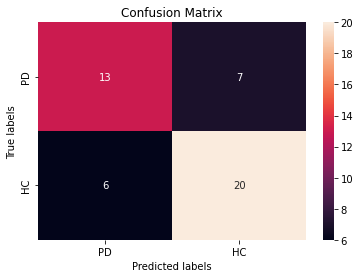

In [48]:
cm4=confusion_matrix(test_labels_encoded,VGG19_prediction_knn)
ax=plt.subplot()
sns.heatmap(cm4,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['PD', 'HC'])
ax.yaxis.set_ticklabels(['PD', 'HC']);

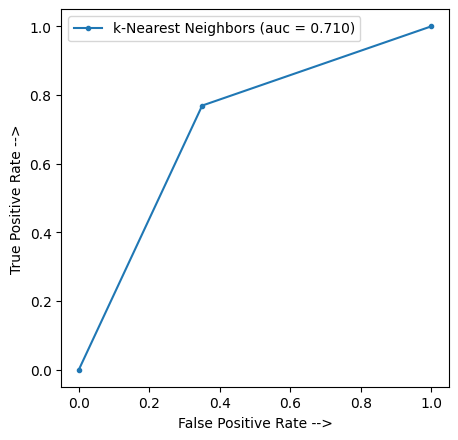

In [49]:
from sklearn.metrics import roc_curve, auc

knn_fpr, knn_tpr, threshold = roc_curve(test_labels_encoded, VGG19_prediction_knn)
auc_knn = auc(knn_fpr, knn_tpr)


plt.figure(figsize=(5, 5), dpi=100)

plt.plot(knn_fpr, knn_tpr, marker='.', label='k-Nearest Neighbors (auc = %0.3f)' % auc_knn)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [53]:
from sklearn.ensemble import VotingClassifier

voting_clf1=VotingClassifier(
                            estimators=[('svc',VGG19_SF),('lr',VGG19_LF),('rf',VGG19_RF)],
                            voting='soft'
)

voting_clf2=VotingClassifier(
                            estimators=[('svc',VGG19_SF),('lr',VGG19_LF),('knn',VGG19_knn),('rf',VGG19_RF)],
                            voting='hard'
)

In [54]:
voting_clf1.fit(VGG19_X,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier(estimators=[('svc', SVC(C=13, probability=True)),
                             ('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42))],
                 voting='soft')

In [55]:
VGG19_prediction_softVoting=voting_clf1.predict(VGG19_X_test_features)
VGG19_prediction_softVoting1=le.inverse_transform(VGG19_prediction_softVoting)
from sklearn import metrics
print("Accuracy= ",metrics.accuracy_score(test_labels_encoded,VGG19_prediction_softVoting))

Accuracy=  0.8260869565217391


In [56]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_encoded,VGG19_prediction_softVoting))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81        20
           1       0.88      0.81      0.84        26

    accuracy                           0.83        46
   macro avg       0.82      0.83      0.82        46
weighted avg       0.83      0.83      0.83        46



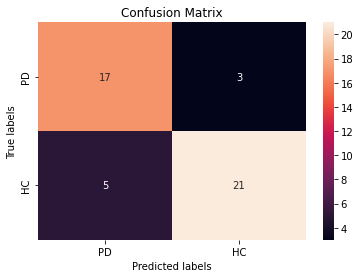

In [57]:
cm6=confusion_matrix(test_labels_encoded,VGG19_prediction_softVoting)
ax=plt.subplot()
sns.heatmap(cm6,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['PD', 'HC'])
ax.yaxis.set_ticklabels(['PD', 'HC']);

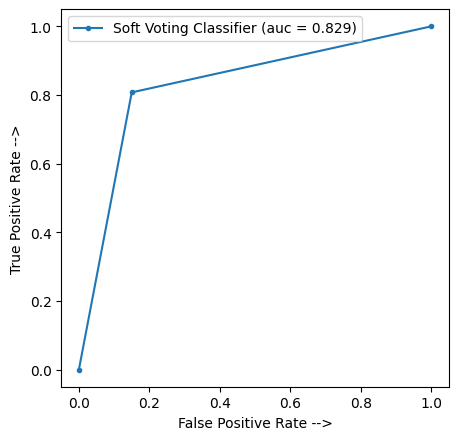

In [58]:
from sklearn.metrics import roc_curve, auc

SoftVoting_fpr, SoftVoting_tpr, threshold = roc_curve(test_labels_encoded, VGG19_prediction_softVoting)
auc_SoftVoting = auc(SoftVoting_fpr, SoftVoting_tpr)


plt.figure(figsize=(5, 5), dpi=100)

plt.plot(SoftVoting_fpr, SoftVoting_tpr, marker='.', label='Soft Voting Classifier (auc = %0.3f)' % auc_SoftVoting)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [59]:
voting_clf2.fit(VGG19_X,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


VotingClassifier(estimators=[('svc', SVC(C=13, probability=True)),
                             ('lr', LogisticRegression()),
                             ('knn',
                              KNeighborsClassifier(algorithm='brute',
                                                   n_neighbors=2)),
                             ('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42))])

In [60]:
VGG19_prediction_hardVoting=voting_clf2.predict(VGG19_X_test_features)
VGG19_prediction_hardVoting1=le.inverse_transform(VGG19_prediction_hardVoting)
from sklearn import metrics
print("Accuracy= ",metrics.accuracy_score(test_labels_encoded,VGG19_prediction_hardVoting))

Accuracy=  0.8260869565217391


In [61]:
from sklearn.metrics import classification_report
print(classification_report(test_labels_encoded,VGG19_prediction_hardVoting))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        20
           1       0.85      0.85      0.85        26

    accuracy                           0.83        46
   macro avg       0.82      0.82      0.82        46
weighted avg       0.83      0.83      0.83        46



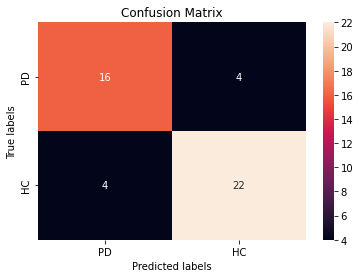

In [62]:
cm6=confusion_matrix(test_labels_encoded,VGG19_prediction_hardVoting)
ax=plt.subplot()
sns.heatmap(cm6,annot=True)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['PD', 'HC'])
ax.yaxis.set_ticklabels(['PD', 'HC']);

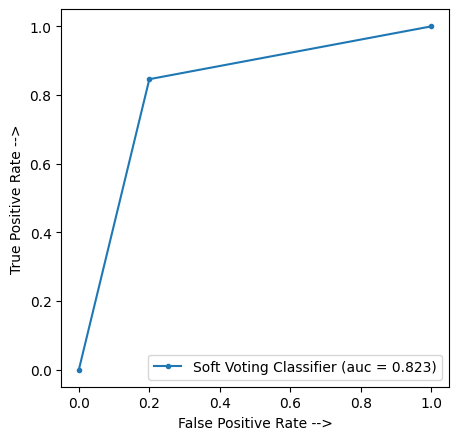

In [63]:
from sklearn.metrics import roc_curve, auc

SoftVoting_fpr, SoftVoting_tpr, threshold = roc_curve(test_labels_encoded, VGG19_prediction_hardVoting)
auc_SoftVoting = auc(SoftVoting_fpr, SoftVoting_tpr)


plt.figure(figsize=(5, 5), dpi=100)

plt.plot(SoftVoting_fpr, SoftVoting_tpr, marker='.', label='Soft Voting Classifier (auc = %0.3f)' % auc_SoftVoting)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()